# scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.random.uniform(-3,3,size=100)#从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
X=x.reshape(-1,1)
X.shape

(100, 1)

In [3]:
y= 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)#0-1之间的正态分布

In [4]:
from sklearn.preprocessing import PolynomialFeatures#多项式特性

In [5]:
poly=PolynomialFeatures(degree=2)#degree代表最低按添加几次幂到特征中 
poly.fit(X)
X2=poly.transform(X)#转换为X2

In [6]:
X2.shape#为3列

(100, 3)

In [7]:
X2[:5,:]#第一列为X^0，第二列为X^1，第三列为X^2(实质就是第二列值的平方)

array([[ 1.        , -0.71387299,  0.50961464],
       [ 1.        , -1.63662311,  2.67853521],
       [ 1.        , -2.30443072,  5.31040095],
       [ 1.        , -0.64317704,  0.4136767 ],
       [ 1.        , -1.6072272 ,  2.58317927]])

In [8]:
X[:5,:]

array([[-0.71387299],
       [-1.63662311],
       [-2.30443072],
       [-0.64317704],
       [-1.6072272 ]])

In [9]:
print(X[0,0])
print(X2[0,1])
print(X[0,0]**2)
print(X2[0,2])

-0.7138729851260646
-0.7138729851260646
0.5096146388927983
0.5096146388927983


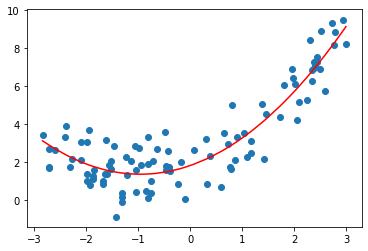

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)
plt.scatter(X,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')#经过排序后的绘图
plt.show()#用多项式回归的效果

In [11]:
lin_reg2.coef_

array([0.        , 0.95475676, 0.49899608])

In [12]:
lin_reg2.intercept_#解决接近2

1.8291317716995967

# 关于PolynomialFeatures

In [13]:
X = np.arange(1,11)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
X=X.reshape(-1,2)#转为2列的数据
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
X.shape

(5, 2)

In [16]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [17]:
X2.shape

(5, 6)

In [18]:
X2#发现多的那三列：第一列为特征1的平方，第三列为特征2的平方，第二列为特征1和特征2的乘积

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [19]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)
X3.shape#共有10列，见笔记中的解释

(5, 10)

In [20]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## Pipeline 沿着管道运行下去

In [21]:
x=np.random.uniform(-3,3,size=100)#从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
X=x.reshape(-1,1)
y= 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)#0-1之间的正态分布

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
poly_reg=Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),#标准化处理
    ("lin_reg",LinearRegression())
])#先运行poly，再std_scaler，最后为lin_reg，按照流水线依次操作

In [23]:
poly_reg.fit(X,y)
y_predict=poly_reg.predict(X)

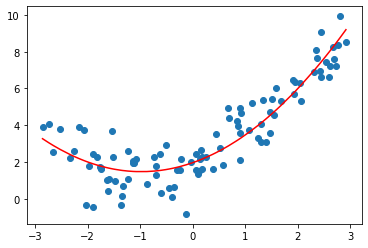

In [24]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()